In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [24]:
train_transforms = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [25]:
test_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [26]:
root = r'../3. CNN/data/CATS_DOGS'

train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform=train_transforms)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform=test_transforms)

torch.manual_seed(42)

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, shuffle=False, batch_size=10)

class_names = train_data.classes


In [27]:
class_names

['CAT', 'DOG']

In [28]:
len(train_data)

18743

In [29]:
len(test_data)

6251

In [30]:
for images, labels in train_loader:
    break

In [31]:
images.shape

torch.Size([10, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


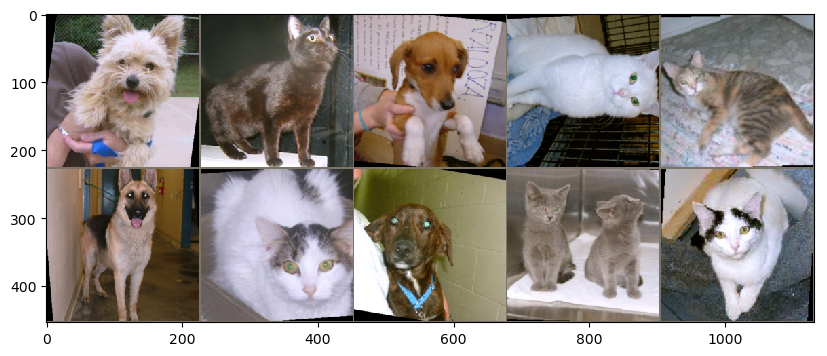

In [32]:
im = make_grid(images, nrow=5)
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)
inv_tensor = inv_normalize(im)

plt.figure(figsize = (12,4))
plt.imshow(np.transpose(inv_tensor.numpy(), (1,2,0)))

In [33]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(54*54*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)
        

In [34]:
torch.manual_seed(101)
CNNmodel = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr=0.001)
CNNmodel


ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [35]:
CNNmodel

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [36]:
# import time
# start_time = time.time()

# epochs = 3

# max_trn_batch = 800
# max_tst_batch = 300

# train_losses = []
# test_losses = []
# train_correct = []
# test_correct = []

# for i in range(epochs):
#     trn_corr = 0
#     tst_corr = 0
    
#     # Run the training batches
#     for b, (X_train, y_train) in enumerate(train_loader):
        
#         # Limit the number of batches
#         if b == max_trn_batch:
#             break
#         b+=1
        
#         # Apply the model
#         y_pred = CNNmodel(X_train)
#         loss = criterion(y_pred, y_train)
 
#         # Tally the number of correct predictions
#         predicted = torch.max(y_pred.data, 1)[1]
#         batch_corr = (predicted == y_train).sum()
#         trn_corr += batch_corr
        
#         # Update parameters
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # Print interim results
#         if b%200 == 0:
#             print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
# accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

#     train_losses.append(loss)
#     train_correct.append(trn_corr)

#     # Run the testing batches
#     with torch.no_grad():
#         for b, (X_test, y_test) in enumerate(test_loader):
#             # Limit the number of batches
#             if b == max_tst_batch:
#                 break

#             # Apply the model
#             y_val = CNNmodel(X_test)

#             # Tally the number of correct predictions
#             predicted = torch.max(y_val.data, 1)[1] 
#             tst_corr += (predicted == y_test).sum()

#     loss = criterion(y_val, y_test)
#     test_losses.append(loss)
#     test_correct.append(tst_corr)

# print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

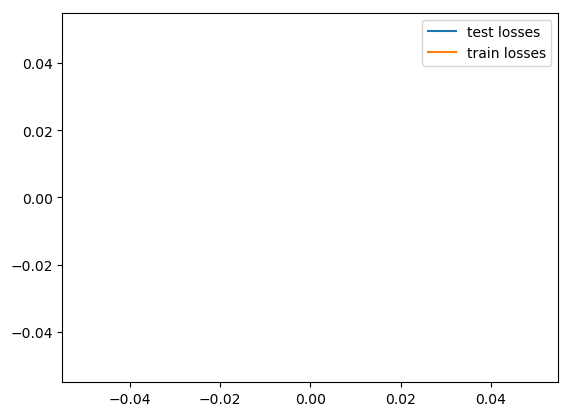

In [37]:
plt.plot(test_losses, label = 'test losses')
plt.plot(train_losses, label='train losses')
plt.legend()

In [38]:
AlexNetmodel = models.alexnet(pretrained=True)

In [39]:
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [40]:
for param in AlexNetmodel.parameters():
    param.required_grad = False

In [41]:
torch.manual_seed(42)

AlexNetmodel.classifier = nn.Sequential(nn.Linear(9216, 1024),
                                        nn.ReLU(),
                                        nn.Dropout(0.5),
                                        nn.Linear(1024,2),
                                        nn.LogSoftmax())

In [44]:
AlexNetmodel

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5)
    (3): Linear(in_featur

In [45]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(AlexNetmodel.classifier.parameters(), lr=0.001)

In [46]:
import time
start_time = time.time()

epochs = 1

max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        # Limit the number of batches
        if b == max_trn_batch:
            break
        b+=1
        
        # Apply the model
        y_pred = AlexNetmodel(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/8000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Limit the number of batches
            if b == max_tst_batch:
                break

            # Apply the model
            y_val = AlexNetmodel(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:  200 [  2000/8000]  loss: 3.31983566  accuracy:  88.200%
epoch:  0  batch:  400 [  4000/8000]  loss: 0.06375264  accuracy:  90.425%
epoch:  0  batch:  600 [  6000/8000]  loss: 0.20559505  accuracy:  91.267%
epoch:  0  batch:  800 [  8000/8000]  loss: 0.13976212  accuracy:  91.875%

Duration: 349 seconds


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


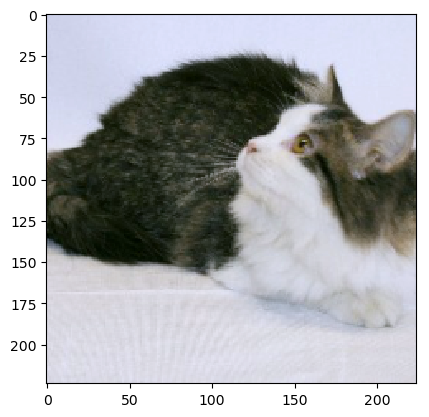

In [49]:
x = 2019
im = inv_normalize(test_data[x][0])
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [53]:

AlexNetmodel.eval()
with torch.no_grad():
    new_pred = AlexNetmodel(test_data[x][0].view(1,3,224,224))
print(f'Predicted value: {new_pred.argmax()}' )

Predicted value: 0


In [71]:

AlexNetmodel.eval()
with torch.no_grad():
    new_pred = AlexNetmodel(test_data[x][0].view(1,3,224,224))
predicted = torch.max(new_pred.data, 1)[1]
print(y_pred)
torch.max(y_pred, 1)[0]

tensor([[-1.2700e-01, -2.1264e+00],
        [-1.1779e-01, -2.1972e+00],
        [-7.7426e+00, -4.3404e-04],
        [-1.1075e+00, -4.0107e-01],
        [-1.6296e-03, -6.4203e+00],
        [-4.3307e+00, -1.3246e-02],
        [-5.2483e-01, -8.9565e-01],
        [-1.2350e+01, -4.2915e-06],
        [-2.1016e-01, -1.6631e+00],
        [-6.5212e+00, -1.4729e-03]], grad_fn=<LogSoftmaxBackward>)


tensor([-1.2700e-01, -1.1779e-01, -4.3404e-04, -4.0107e-01, -1.6296e-03,
        -1.3246e-02, -5.2483e-01, -4.2915e-06, -2.1016e-01, -1.4729e-03],
       grad_fn=<MaxBackward0>)

In [90]:
classes = ['Cat', 'dog']
pred = torch.max(y_pred, dim=1)[1]
pred

for i in pred:
    print(classes[i])
# classes[torch.max(y_pred, dim=1)[1]]


Cat
Cat
dog
dog
Cat
dog
Cat
dog
Cat
dog


tensor([[-1.2700e-01, -2.1264e+00],
        [-1.1779e-01, -2.1972e+00],
        [-7.7426e+00, -4.3404e-04],
        [-1.1075e+00, -4.0107e-01],
        [-1.6296e-03, -6.4203e+00],
        [-4.3307e+00, -1.3246e-02],
        [-5.2483e-01, -8.9565e-01],
        [-1.2350e+01, -4.2915e-06],
        [-2.1016e-01, -1.6631e+00],
        [-6.5212e+00, -1.4729e-03]], grad_fn=<LogSoftmaxBackward>)